# **(PCA) of multidimensional points **


In this Jupyter notebook, we will be performing Principal Component Analysis (PCA) using the points provided is exp_2d_blobs using the easy approach.

---

### Imports

In [1]:
from time import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
from sklearn.datasets import make_blobs
import pylab as pl
from sklearn.cluster import Birch, MiniBatchKMeans
from sklearn.mixture import GaussianMixture
# from robotikos.metric import IdentityFeature
# from robotikos.metric import (NormalizedSumSquaredDiffMetric,
#                               NormalizedSumAbsDiffMetric)
from thetan.theta import theta_g1, assign
from thetan.theta import distance_matrix as tdm
from sklearn.cluster import KMeans
from sklearn.metrics import normalized_mutual_info_score, silhouette_score, fowlkes_mallows_score

import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

### Load 3d data from exp_2d_blobs test.py

In [8]:
verbose = True
show_thr = False
evaluation_thr = 0.1
radius = 4
n_local_samples = 30
blob_dis = 33
cluster_per_dim = 10
blob_dis = 15
cluster_x = 10
cluster_y = 10
cluster_z = 10
numberOfDimensions = 3
#measurement for centroid accuracy
#should be one 1000 clusters in 3dimensions 
xx = np.arange(-1*blob_dis*cluster_x//2, blob_dis*cluster_x//2, blob_dis)
yy = np.arange(-1*blob_dis*cluster_y//2, blob_dis*cluster_y//2, blob_dis)
zz = np.arange(-1*blob_dis*cluster_z//2, blob_dis*cluster_z//2, blob_dis)

xx, yy, zz = np.meshgrid(xx, yy, zz )
#of centers should be 1000
n_centres = np.hstack((np.ravel(xx)[:, np.newaxis],
                    np.ravel(yy)[:, np.newaxis], 
                    np.ravel(zz)[:,np.newaxis]))



gt_centroids = []
#here the number of dimensions is increased to 3 
# X = np.zeros((n_local_samples * n_centres.shape[0], 3))
X = np.zeros((n_local_samples * n_centres.shape[0], numberOfDimensions))
y = np.zeros((n_local_samples * n_centres.shape[0]), dtype=np.int16)
for i in range(n_centres.shape[0]):
    cpos = n_centres[i]

    local_X = cpos + np.random.normal(0, 1, (n_local_samples, numberOfDimensions))
    X[i * n_local_samples: (i + 1) * n_local_samples] = local_X
    y[i * n_local_samples: (i + 1) * n_local_samples] = i
    gt_centroids.append(local_X.mean(axis=0))

gt_centroids = np.array(gt_centroids)

points = X

labels = y
sz = len(n_centres)

centroids = gt_centroids
#put everything one line 
#goal for next week 
#plot X and y and attempt to plot up to 5 6 dimensions 
#create a function to return experiment set up 




print('Before shuffling')
print(points[:10])

points_idx = np.arange(np.shape(points)[0])
np.random.shuffle(points_idx)
new_points = np.zeros(np.shape(points))
new_labels = np.zeros(np.shape(labels))
for i, idx in zip(range(np.shape(points)[0]), points_idx):
    new_points[i] = points[idx]
    new_labels[i] = labels[idx]

points = new_points
labels = new_labels

print('After shuffling')
print(points[:10])
dfPoints = pd.DataFrame(points, columns = ['X','Y','Z'])



Before shuffling
[[-75.58833965 -75.13917052 -75.18582965]
 [-74.74776358 -75.81001645 -73.23066112]
 [-75.39834357 -71.93844895 -76.68284191]
 [-75.4909842  -74.93261294 -75.78078666]
 [-75.273219   -73.4482483  -75.76392733]
 [-75.22912996 -73.50778869 -72.55429303]
 [-74.83188307 -74.52949022 -75.34733607]
 [-75.17712642 -74.72883589 -74.49552712]
 [-73.31332566 -74.38050798 -73.87291423]
 [-76.2172238  -74.30629525 -73.66593768]]
After shuffling
[[-15.54636235 -14.41960905 -61.18732961]
 [-73.69397853 -31.85570477  29.59769379]
 [-29.4761001  -30.3335142  -15.5213414 ]
 [ 60.49833978   0.15572813  14.12502887]
 [ -1.24991012  60.28457892  31.67426531]
 [-28.50152755  16.85998009  59.51703193]
 [ 29.54100153 -74.59838476 -44.65126814]
 [-59.06422704  15.54353174  15.35349712]
 [-46.56018324  15.10583695  30.09987914]
 [ 31.92933742  60.54001286  30.94877695]]


In [49]:
print(centroids)

[[-74.78384458 -75.1570559  -74.92985174]
 [-74.90018714 -75.01880273 -60.39260697]
 [-75.22721511 -75.24433024 -44.78426214]
 ...
 [ 60.07918732  59.93786342  29.9703001 ]
 [ 59.98269297  59.98532671  45.24074152]
 [ 59.94494581  59.98212201  60.15955699]]


### Load 4d data from exp_2d_blobs test.py

In [9]:
verbose = True
show_thr = False
evaluation_thr = 0.1
radius = 4
n_local_samples = 30
blob_dis = 33
cluster_per_dim = 10
blob_dis = 15
cluster_x = 10
cluster_y = 10
cluster_z = 10
numberOfDimensions = 3
#measurement for centroid accuracy
#should be one 1000 clusters in 3dimensions 
xx = np.arange(-1*blob_dis*cluster_x//2, blob_dis*cluster_x//2, blob_dis)
yy = np.arange(-1*blob_dis*cluster_y//2, blob_dis*cluster_y//2, blob_dis)
zz = np.arange(-1*blob_dis*cluster_z//2, blob_dis*cluster_z//2, blob_dis)

xx, yy, zz = np.meshgrid(xx, yy, zz )
#of centers should be 1000
n_centres = np.hstack((np.ravel(xx)[:, np.newaxis],
                    np.ravel(yy)[:, np.newaxis], 
                    np.ravel(zz)[:,np.newaxis] ))



gt_centroids = []
#here the number of dimensions is increased to 3 
# X = np.zeros((n_local_samples * n_centres.shape[0], 3))
X = np.zeros((n_local_samples * n_centres.shape[0], numberOfDimensions))
y = np.zeros((n_local_samples * n_centres.shape[0]), dtype=np.int16)
for i in range(n_centres.shape[0]):
    cpos = n_centres[i]

    local_X = cpos + np.random.normal(0, 1, (n_local_samples, numberOfDimensions))
    X[i * n_local_samples: (i + 1) * n_local_samples] = local_X
    y[i * n_local_samples: (i + 1) * n_local_samples] = i
    gt_centroids.append(local_X.mean(axis=0))

gt_centroids = np.array(gt_centroids)

points = X

labels = y
sz = len(n_centres)

centroids = gt_centroids
#put everything one line 
#goal for next week 
#plot X and y and attempt to plot up to 5 6 dimensions 
#create a function to return experiment set up 




print('Before shuffling')
print(points[:10])

points_idx = np.arange(np.shape(points)[0])
np.random.shuffle(points_idx)
new_points = np.zeros(np.shape(points))
new_labels = np.zeros(np.shape(labels))
for i, idx in zip(range(np.shape(points)[0]), points_idx):
    new_points[i] = points[idx]
    new_labels[i] = labels[idx]

points = new_points
labels = new_labels

print('After shuffling')
print(points[:10])
dfPoints = pd.DataFrame(points, columns = ['X','Y','Z'])



Before shuffling
[[-74.56619998 -75.03339613 -73.64234936]
 [-76.96161211 -72.86386969 -73.52005889]
 [-74.71996364 -74.94399638 -74.93282192]
 [-75.55222054 -75.13224397 -74.66735237]
 [-73.80065828 -74.70496502 -75.6191782 ]
 [-75.63248142 -74.85275311 -73.59128485]
 [-74.75966567 -76.54363936 -74.74084901]
 [-75.80703446 -75.20740361 -73.62508709]
 [-74.57278297 -74.4111092  -74.24858794]
 [-75.13371681 -74.99027945 -74.32050328]]
After shuffling
[[ 61.43901818  15.3824576   58.95559714]
 [ 60.41183256  44.63036316  46.15319859]
 [-59.0500524   30.49159468 -59.20059242]
 [ 14.74653642 -75.44621141  15.53213221]
 [-73.87961442   0.92570282  -0.71165692]
 [-45.36709346 -58.74725416 -59.80062366]
 [-75.83851828 -75.96311682   0.7866998 ]
 [ 14.92011299 -60.57934934 -57.97174717]
 [ 28.96485665  14.40108407 -60.74885008]
 [ 14.66085426  15.43016465 -73.54109132]]


# Performing kmeans++ and tm 

In [10]:
t1 = time()
kmeans = KMeans(n_clusters=np.prod(sz), init='k-means++', n_init=1,
                max_iter=300, tol=0.0001, random_state=0).fit(points)
t2 = time()

kmeans_time = t2 - t1
print('kmeans++ ', kmeans_time)

kcentroids = kmeans.cluster_centers_
klabels = kmeans.labels_
tmp = 0


#calculating theta centroids
theta = 6.0

t1 = time()
tcentroids, tlabels = theta_g1(points, theta=theta,)
t2 = time()

tm_time = t2 - t1
print('tm ', tm_time)

dfTCentroids = pd.DataFrame(tcentroids, columns = ['X','Y','Z'])
dfKCentroids = pd.DataFrame(kcentroids, columns = ['X','Y','Z'])
# print(dfTCentroids)
dftlabels = pd.DataFrame(tlabels)
dfPoints['tlabel'] = dftlabels
dfklabels = pd.DataFrame(klabels)
dfPoints['klabel'] = dfklabels
dfPoints.head()
print("tshape")
print(tcentroids.shape)
print("kshape")
print(kcentroids.shape)

kmeans++  1.981112003326416
tm  0.1928269863128662
tshape
(1000, 3)
kshape
(1000, 3)


### Input features

In [8]:
print(points)

[[ 14.90187374 -45.18325431 -57.83998546]
 [-43.64950569 -45.17730574 -45.13807141]
 [-14.91818179 -75.07126449 -14.8204576 ]
 ...
 [ 13.20485082 -46.61766483  28.95529425]
 [ 60.37631835 -60.44660598 -44.88204368]
 [ 15.30527839 -44.19931071  13.50998965]]


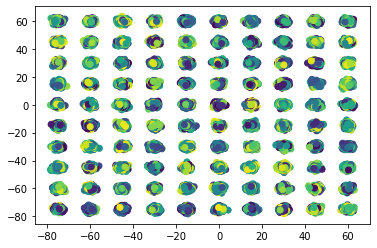

In [9]:
import matplotlib.pyplot as plt
plt.scatter(points[:,0], points[:,1], c=tlabels)
plt.show()

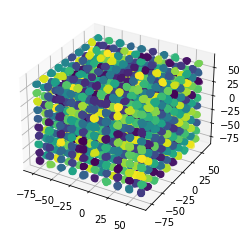

In [10]:
fig = plt.figure()      
ax = fig.add_subplot(projection='3d')
ax.scatter(points[:,0], points[:,1], points[:,2], c=tlabels)

plt.show()


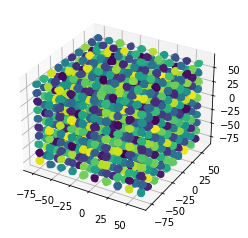

In [11]:
fig = plt.figure()      
ax = fig.add_subplot(projection='3d')
ax.scatter(points[:,0], points[:,1], points[:,2], c=klabels)
plt.show()


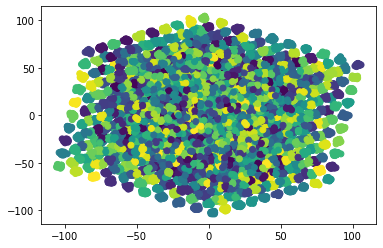

In [12]:

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Xt = pca.fit_transform(points)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=tlabels)

# plt.legend(handles=plot.legend_elements()[0], labels=dfPoints['tlabels'])
plt.show()

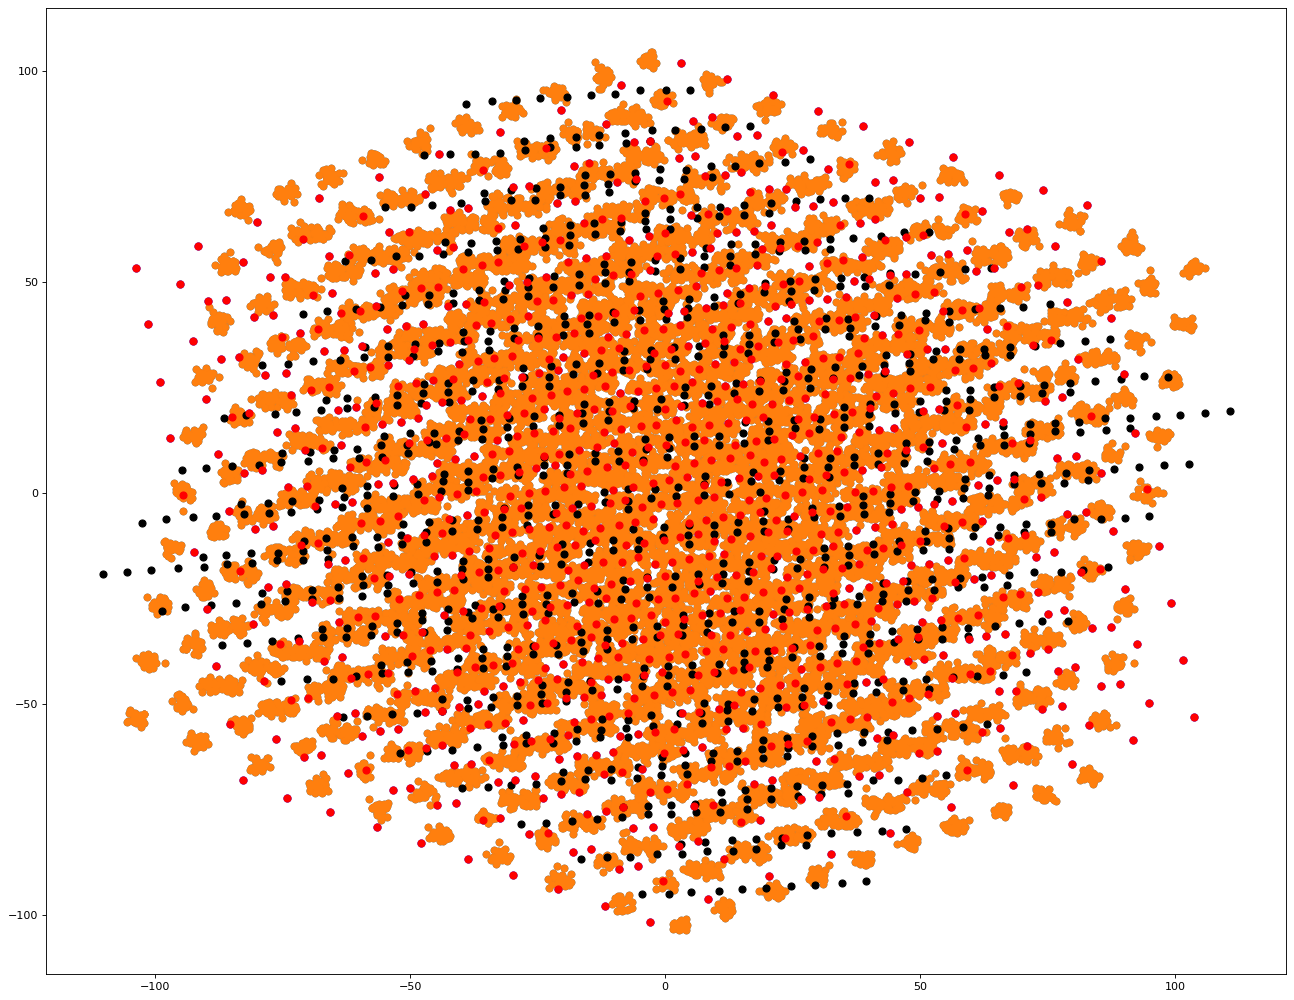

In [55]:
from matplotlib.pyplot import figure

figure(figsize=(20, 16), dpi=80)
#tcentroids
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Xt = pca.fit_transform(points)
Tc = pca.fit_transform(tcentroids)
plot = plt.scatter(Xt[:,0], Xt[:,1])
plt.scatter(Tc[:,0] , Tc[:,1] , s = 40, color = 'blue')
# plt.legend(handles=plot.legend_elements()[0], labels=dfPoints['tlabels'])

#kcentroids
Kc = pca.fit_transform(kcentroids)
plot = plt.scatter(Xt[:,0], Xt[:,1])
plt.scatter(Kc[:,0] , Kc[:,1] , s = 40, color = 'black')
Ac = pca.fit_transform(centroids)

plt.scatter(Ac[:,0] , Ac[:,1] , s = 40, color = 'red')
plt.show()

#as the radius get smaller more errors will occur on km
#threshold is important for comparision, has to be smaller than theta 
# 4d data and get some accuracy measure of ground truth to calculated centroids

In [13]:
tlabels.shape

(30000,)

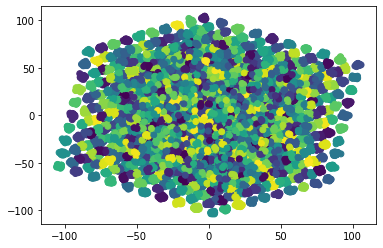

In [14]:

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Xt = pca.fit_transform(points)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=klabels)
# plt.legend(handles=plot.legend_elements()[0], labels=dfPoints['tlabels'])
plt.show()

In [15]:
klabels.shape

(30000,)

In [16]:
import plotly.express as px
from sklearn.decomposition import PCA

df = dfPoints
X = dfPoints[['X', 'Y', 'Z']]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=df['tlabel'], title='Thetan')
fig
fig.show()

In [17]:
import plotly.express as px
from sklearn.decomposition import PCA

df = dfPoints
X = dfPoints[['X', 'Y', 'Z']]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=df['klabel'], title='Kmeans++')

fig.show()

In [18]:
import plotly.express as px
from sklearn.decomposition import PCA

df = dfPoints
X = dfPoints[['X', 'Y', 'Z']]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, title='Kmeans++')

fig.show()